In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update(**{'figure.dpi':150})
plt.style.use('ggplot') # can skip this - plots are more visually appealing with this style

## Read in the datasets and extract a subset for each

In [3]:
df = pd.read_csv('data.csv')
df_transformed = df
print(f'Number of observations: {df.shape}')

Number of observations: (30746, 20)


What is this dataset about?

This dataset is describing the attributes of employees inside the company. 

## EDA

In [4]:
# first 5 samples of employee data
df.head(5)

,TARGET,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,AMT_CREDIT,TOTALAREA_MODE,HOUSETYPE_MODE,EXT_SOURCE_1,DAYS_EMPLOYED,DAYS_BIRTH,EXT_SOURCE_2,EXT_SOURCE_3,NAME_EDUCATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS
0,0,0,2.0,M,Y,Y,225000.0,Commercial associate,382500.0,0.0198,block of flats,0.806048,-3336,-22787,0.740220,0.684828,Higher education,3.0,House / apartment,Civil marriage
1,0,0,2.0,F,N,N,180000.0,Commercial associate,225000.0,0.0030,terraced house,0.632088,-874,-9799,0.400752,0.586740,Higher education,1.0,Rented apartment,Married
2,0,0,2.0,M,N,N,153990.0,Commercial associate,654498.0,NaN,NaN,NaN,-241,-12040,0.369478,NaN,Secondary / secondary special,NaN,With parents,Married
3,0,3,5.0,F,N,N,99000.0,Working,299772.0,NaN,NaN,NaN,-3148,-10351,0.290338,0.597192,Secondary / secondary special,3.0,Rented apartment,Married
4,0,0,2.0,F,Y,Y,135000.0,Commercial associate,254700.0,0.0270,block of flats,NaN,-3272,-12837,0.449632,0.853731,Secondary / secondary special,3.0,House / apartment,Married


### Missing values and cleaning
Analyze missing values. Remove columns with many missing values and for the remaining columns impute the missing values (argue the chocie of the underlying imputation algorithm)

In [5]:
# Total number of missing values
df.isnull().sum()

TARGET                            0
CNT_CHILDREN                      0
CNT_FAM_MEMBERS                   0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
AMT_INCOME_TOTAL                  0
NAME_INCOME_TYPE                  0
AMT_CREDIT                        0
TOTALAREA_MODE                14784
HOUSETYPE_MODE                15355
EXT_SOURCE_1                  17309
DAYS_EMPLOYED                     0
DAYS_BIRTH                        0
EXT_SOURCE_2                     53
EXT_SOURCE_3                   5939
NAME_EDUCATION_TYPE               0
AMT_REQ_CREDIT_BUREAU_YEAR     3961
NAME_HOUSING_TYPE                 0
NAME_FAMILY_STATUS                0
dtype: int64

In [6]:
# percentage of nan values out of a given feature
missing = (df.isnull().sum()/df.shape[0]).round(2)
missing[missing > 0]

TOTALAREA_MODE                0.48
HOUSETYPE_MODE                0.50
EXT_SOURCE_1                  0.56
EXT_SOURCE_3                  0.19
AMT_REQ_CREDIT_BUREAU_YEAR    0.13
dtype: float64

#### Things I will do:
1. I will remove the EXT_SOURCE 1 & EXT_SOURCE 3columns since there is no specific description on these columns and there are 56% and 19% missing values. 
2. Remove TOTALAREA_MODE and HOUSETYPE_MODE because there are almost 50% of these values missing. 
3. I will delete missing rows in AMT_REQ_CREDIT_BUREAU_YEAR since only 13% are missing. 
4. I will impute missing values using the average column in the dataset in EXT_SOURCE 2 since there are only 53 missing values. 

In [7]:
# Drop following columns
drop_cols = ['EXT_SOURCE_1', 'EXT_SOURCE_3', 'TOTALAREA_MODE','HOUSETYPE_MODE']
df = df.drop(drop_cols, axis = 1)

# Delete rows with missing values in the 'age' column
df = df.dropna(subset=['AMT_REQ_CREDIT_BUREAU_YEAR'])

# Changing negative values to positive
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].multiply(-1)
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].multiply(-1)

# Impute missing values in the EXT_SOURCE_2 columns
mean = df['EXT_SOURCE_2'].mean()
df['EXT_SOURCE_2'].fillna(mean, inplace=True)

In [8]:
df.isnull().sum()

TARGET                        0
CNT_CHILDREN                  0
CNT_FAM_MEMBERS               0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
AMT_INCOME_TOTAL              0
NAME_INCOME_TYPE              0
AMT_CREDIT                    0
DAYS_EMPLOYED                 0
DAYS_BIRTH                    0
EXT_SOURCE_2                  0
NAME_EDUCATION_TYPE           0
AMT_REQ_CREDIT_BUREAU_YEAR    0
NAME_HOUSING_TYPE             0
NAME_FAMILY_STATUS            0
dtype: int64

### Histograms and skewness

Check skewness of each numerical feature and plot histograms for each such feature. For each skew feature find a transformation that makes it (almost) normal. Create a dataframe with transformed features. 

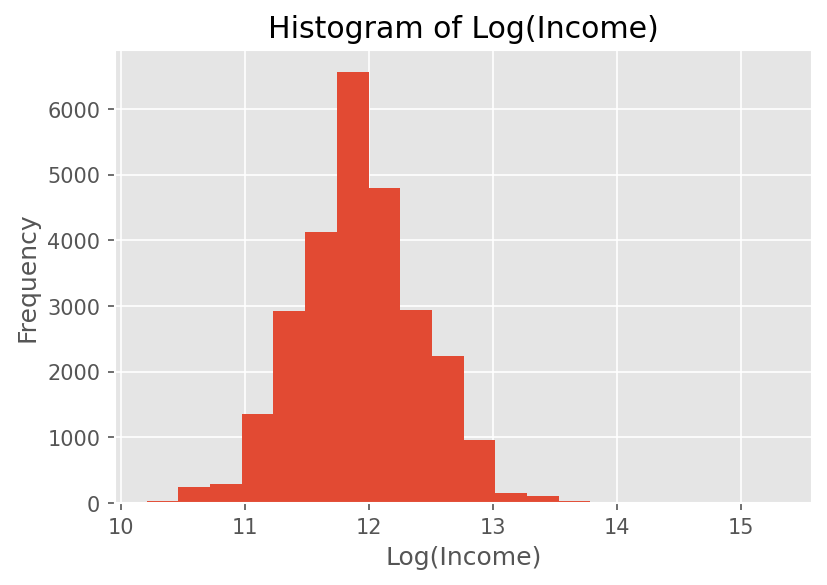

In [9]:
# Histogram of the income

income_data = df['AMT_INCOME_TOTAL']

log_income_data = np.log(income_data)

# replace transformed column into dataframe
df_transformed['AMT_INCOME_TOTAL'] = log_income_data

plt.hist(log_income_data, bins = 20)

# Add labels and title
plt.xlabel('Log(Income)')
plt.ylabel('Frequency')
plt.title('Histogram of Log(Income)')

plt.show()

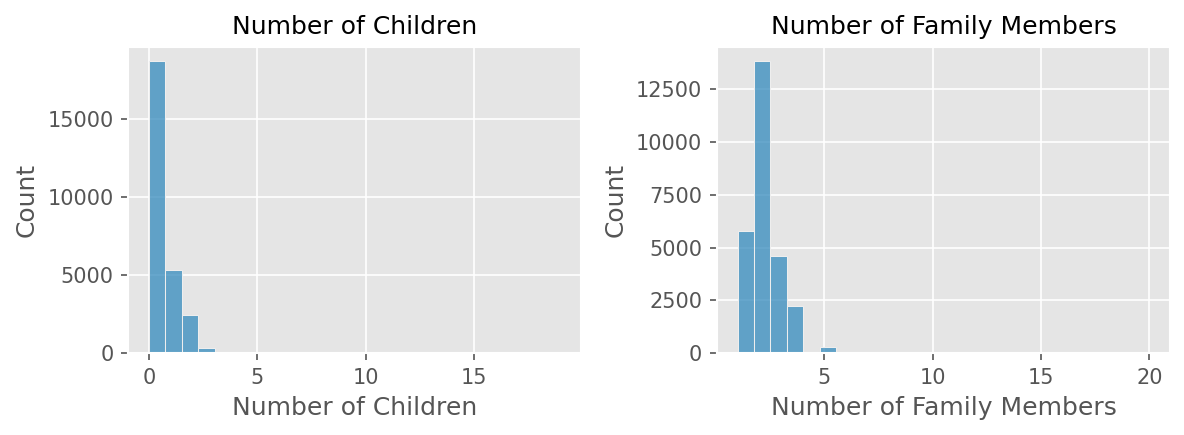

In [10]:
# Number of children and family members

fig,axs = plt.subplots(1,2,figsize=(8,3))
_ = sns.histplot(df,x='CNT_CHILDREN',ax=axs[0],bins = 25)
_ = sns.histplot(df,x='CNT_FAM_MEMBERS',ax=axs[1],bins =25)

# set titles
_ = axs[0].set_title('Number of Children',fontsize=12)
_ = axs[0].set_xlabel('Number of Children',fontsize=12)
_ = axs[1].set_title('Number of Family Members',fontsize=12)
_ = axs[1].set_xlabel('Number of Family Members',fontsize=12)

fig.tight_layout()

In [11]:
# Creating new dataframe with transformed features (square root transformation)

children_data = df['CNT_CHILDREN']
family_data = df['CNT_FAM_MEMBERS']

log_children_data = np.sqrt(children_data)
log_family_data = np.sqrt(family_data)

# replace transformed column into dataframe
df_transformed['CNT_CHILDREN'] = log_children_data
df_transformed['CNT_FAM_MEMBERS'] = log_family_data

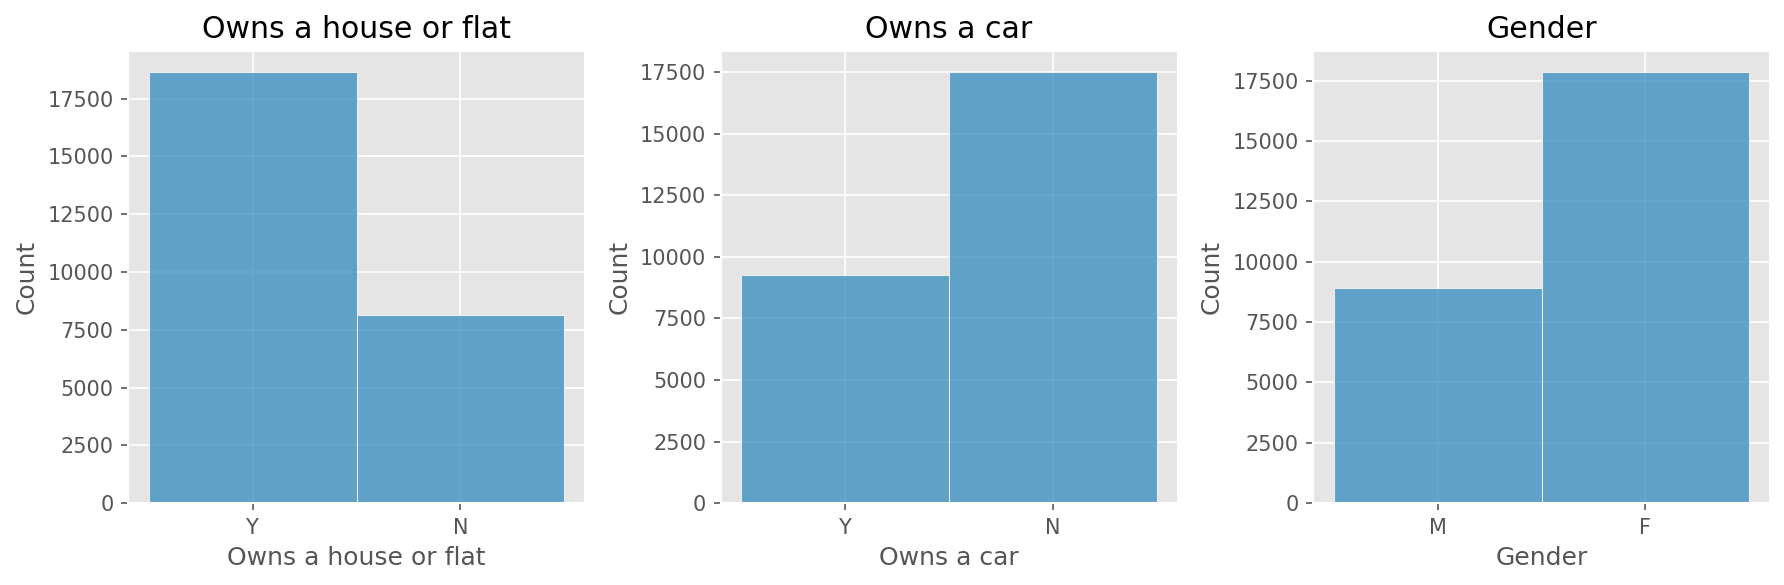

In [12]:
# Figures for properties and gender

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

_ = sns.histplot(df, x='FLAG_OWN_REALTY', ax=axs[0], bins=25)
_ = axs[0].set_title('Owns a house or flat')
_ = axs[0].set_xlabel('Owns a house or flat')

_ = sns.histplot(df, x='FLAG_OWN_CAR', ax=axs[1], bins=25)
_ = axs[1].set_title('Owns a car')
_ = axs[1].set_xlabel('Owns a car')

_ = sns.histplot(df, x='CODE_GENDER', ax=axs[2], bins=25)
_ = axs[2].set_title('Gender')
_ = axs[2].set_xlabel('Gender')

fig.tight_layout()

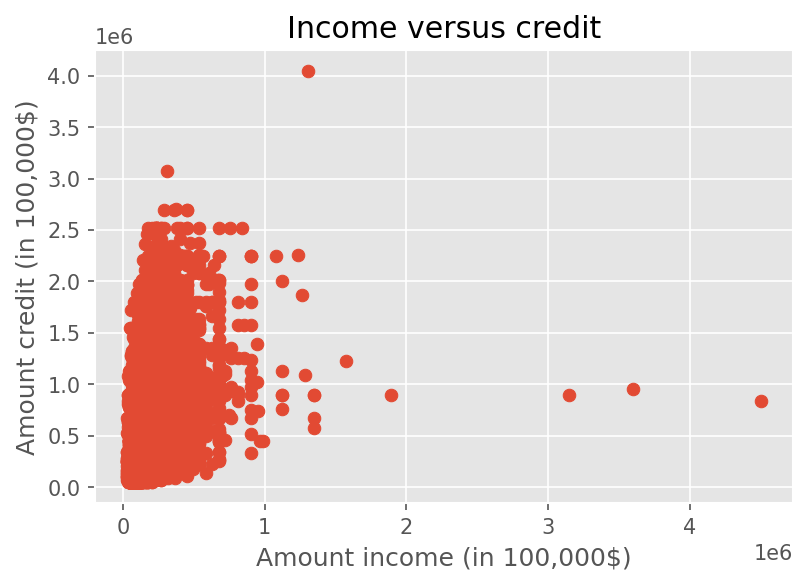

In [13]:
# extract x and y as arrays
x = df['AMT_INCOME_TOTAL'].values
y = df['AMT_CREDIT'].values

# create scatter plot
plt.scatter(x,y)

# add labels and title
plt.xlabel('Amount income (in 100,000$)')
plt.ylabel('Amount credit (in 100,000$)')
plt.title('Income versus credit')

# display the plot
plt.show()

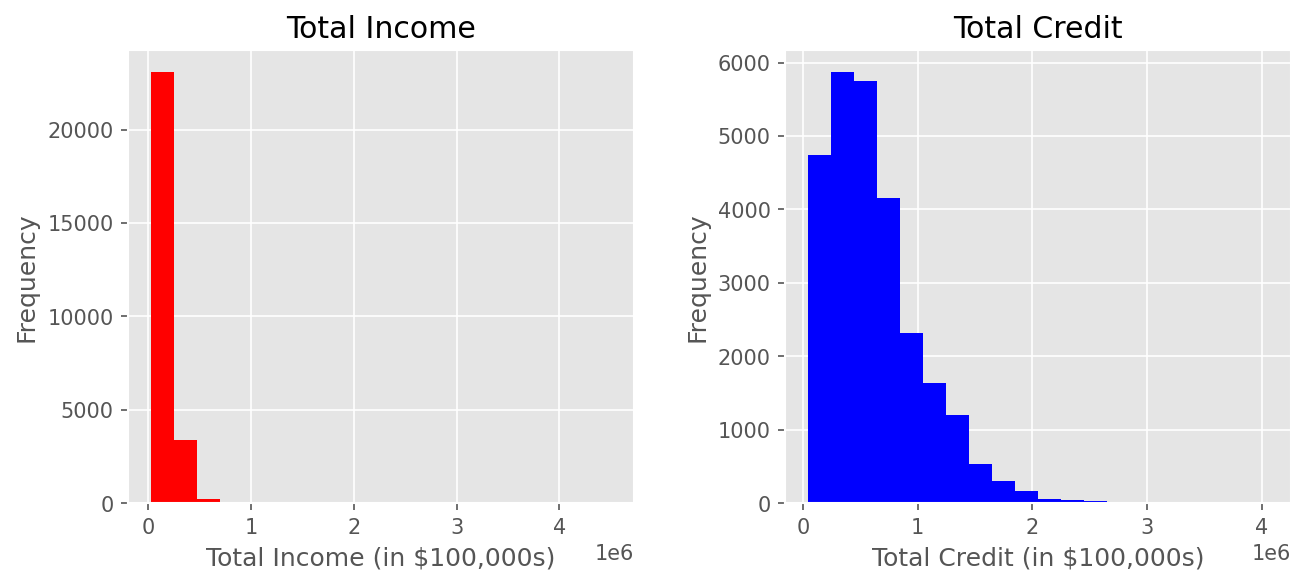

In [14]:
# Figures for income and credit

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# plot histogram of column 1 on the first subplot
axs[0].hist(df['AMT_INCOME_TOTAL'], bins=20, color='red')
axs[0].set_xlabel('Total Income (in $100,000s)')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Total Income')

# plot histogram of column 2 on the second subplot
axs[1].hist(df['AMT_CREDIT'], bins=20, color='blue')
axs[1].set_xlabel('Total Credit (in $100,000s)')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Total Credit')

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# display the plot
plt.show()

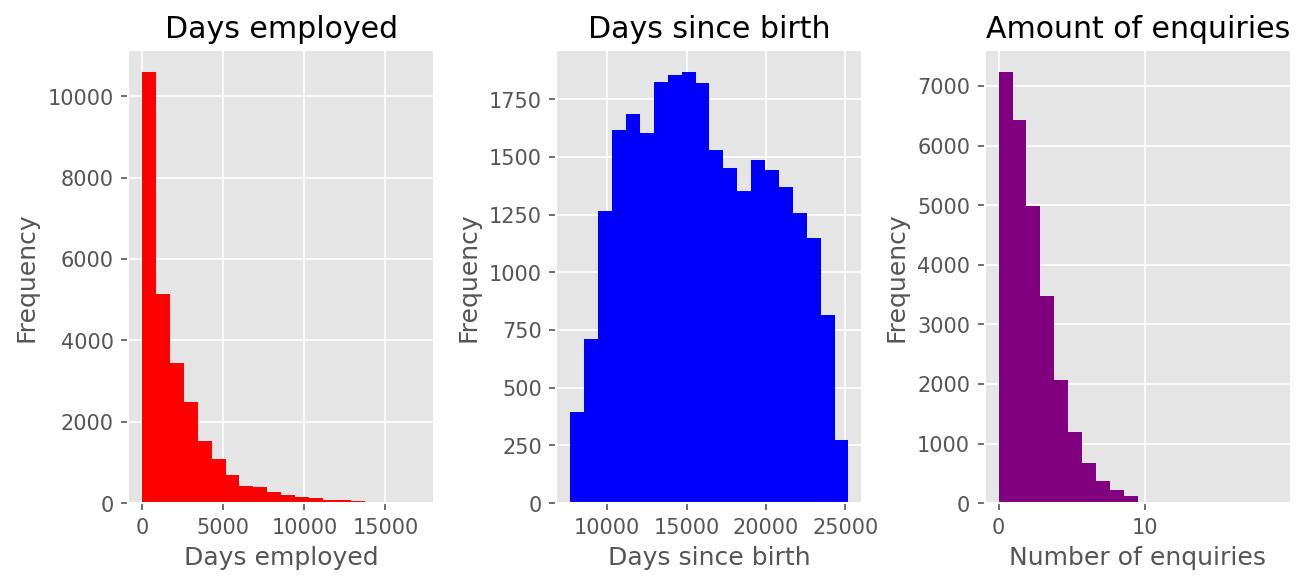

In [15]:
# Figures for employed days, age, and inquiries

fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# plot histogram of column 1 on the first subplot
axs[0].hist(df['DAYS_EMPLOYED'], bins=20, color='red')
axs[0].set_xlabel('Days employed')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Days employed')

# plot histogram of column 2 on the second subplot
axs[1].hist(df['DAYS_BIRTH'], bins=20, color='blue')
axs[1].set_xlabel('Days since birth')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Days since birth')

# plot histogram of column 3 on the second subplot
axs[2].hist(df['AMT_REQ_CREDIT_BUREAU_YEAR'], bins=20, color='purple')
axs[2].set_xlabel('Number of inquiries')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Amount of inquiries')

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# display the plot
plt.show()

In [26]:
# Creating new dataframe with transformed features (square root transformation)

income_data = df['AMT_INCOME_TOTAL']
credit_data = df['AMT_CREDIT']
employed_data = df['DAYS_BIRTH']
inquiries_data = df['AMT_REQ_CREDIT_BUREAU_YEAR']

log_income_data = np.sqrt(income_data)
log_credit_data = np.sqrt(credit_data)
log_employed_data = np.sqrt(employed_data)
log_inquiries_data = np.sqrt(inquiries_data)

# replace transformed column into dataframe
df_transformed['AMT_INCOME_TOTAL'] = log_income_data
df_transformed['AMT_CREDIT'] = log_credit_data
df_transformed['DAYS_BIRTH'] = log_employed_data
df_transformed['AMT_REQ_CREDIT_BUREAU_YEAR'] = log_inquiries_data

## Box Plots

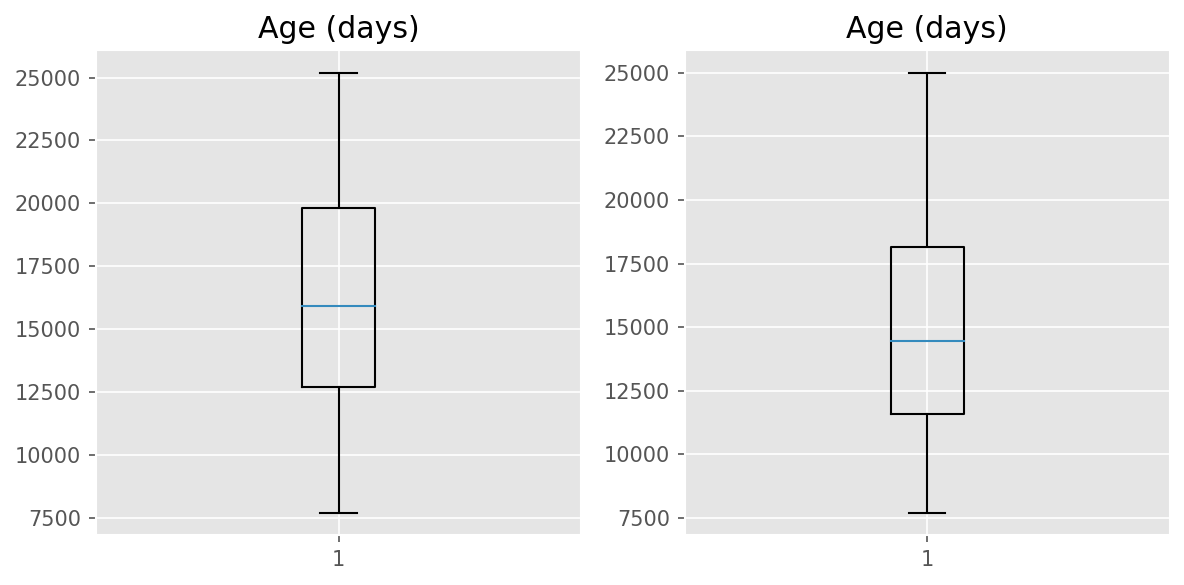

In [17]:
target_df = df[df['TARGET']==0]
non_target_df = df[df['TARGET']==1]

# create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# plot boxplots for column 'A' in first subplot
axs[0].boxplot(target_df['DAYS_BIRTH'], vert=True,showfliers=False)
axs[0].set_title('Age (days)')

# plot boxplots for column 'B' in second subplot
axs[1].boxplot(non_target_df['DAYS_BIRTH'], vert=True,showfliers=False)
axs[1].set_title('Age (days)')

# adjust spacing between subplots and save figure
plt.tight_layout()
plt.savefig('boxplots.png')

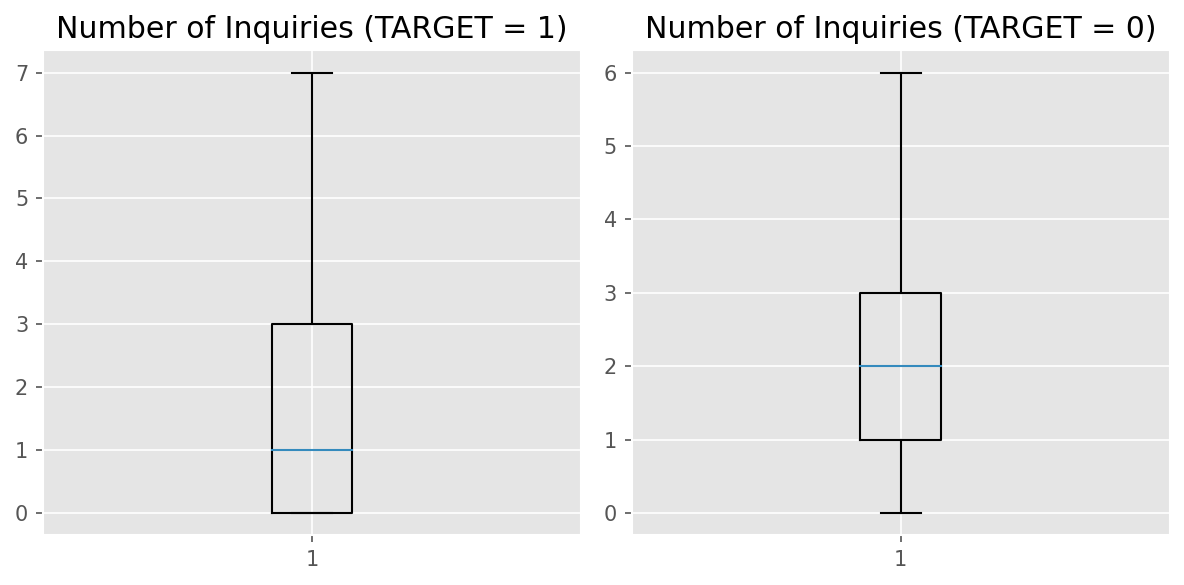

In [18]:
# Box plots of inquiries with target and non-target

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# plot boxplots for column 'A' in first subplot
axs[0].boxplot(target_df['AMT_REQ_CREDIT_BUREAU_YEAR'], vert=True,showfliers=False)
axs[0].set_title('Number of Inquiries (TARGET = 1)')

# plot boxplots for column 'B' in second subplot
axs[1].boxplot(non_target_df['AMT_REQ_CREDIT_BUREAU_YEAR'], vert=True,showfliers=False)
axs[1].set_title('Number of Inquiries (TARGET = 0)')

# adjust spacing between subplots and save figure
plt.tight_layout()
plt.savefig('inqbox.png')

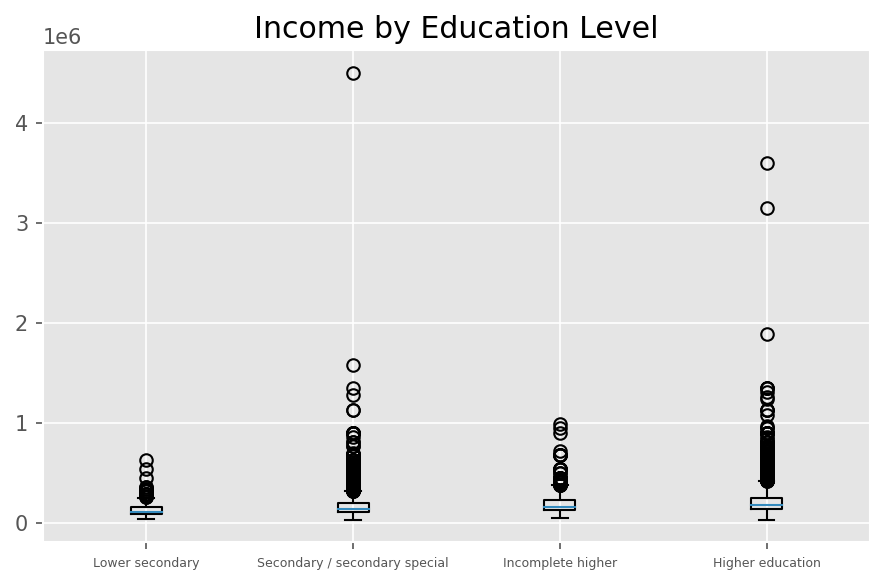

In [19]:
# Income by education level

# create subsets of data
df_1 = df[df['NAME_EDUCATION_TYPE'] == 'Lower secondary']
df_2 = df[df['NAME_EDUCATION_TYPE'] == 'Secondary / secondary special']
df_3 = df[df['NAME_EDUCATION_TYPE'] == 'Incomplete higher']
df_4 = df[df['NAME_EDUCATION_TYPE'] == 'Higher education']

# create a single axis
fig, ax = plt.subplots()

# plot boxplots for each subset of data with outliers
ax.boxplot(df_1['AMT_INCOME_TOTAL'], positions=[1])
ax.boxplot(df_2['AMT_INCOME_TOTAL'], positions=[2])
ax.boxplot(df_3['AMT_INCOME_TOTAL'], positions=[3])
ax.boxplot(df_4['AMT_INCOME_TOTAL'], positions=[4])

# set x-tick labels and title
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education'], fontsize=6)
ax.set_title('Income by Education Level')

# adjust spacing between subplots and save figure
plt.tight_layout()
plt.savefig('edbox1.png')

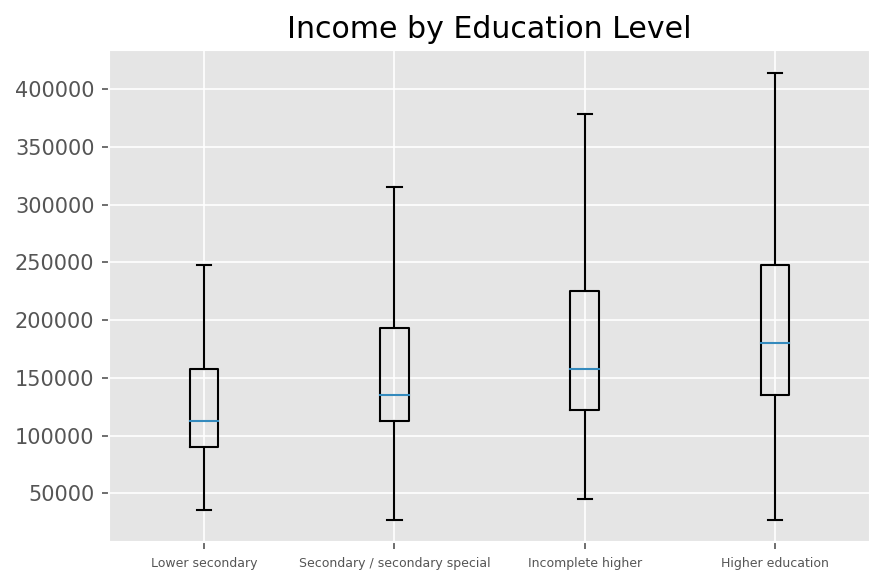

In [20]:
# Income by education level without outliers

# create a single axis
fig, ax = plt.subplots()

# plot boxplots for each subset of data
ax.boxplot(df_1['AMT_INCOME_TOTAL'], positions=[1], showfliers=False)
ax.boxplot(df_2['AMT_INCOME_TOTAL'], positions=[2], showfliers=False)
ax.boxplot(df_3['AMT_INCOME_TOTAL'], positions=[3], showfliers=False)
ax.boxplot(df_4['AMT_INCOME_TOTAL'], positions=[4], showfliers=False)

# set x-tick labels and title
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education'], fontsize=6)
ax.set_title('Income by Education Level')

# adjust spacing between subplots and save figure
plt.tight_layout()
plt.savefig('edbox2.png')

It seems like the minimum value for all of the education levels are similar around 50,000 USD. However, the maximum value seems to get increase by around 50,000 USD for every increase education level. The box (lower quartile, mean, and upper quartile) also increases for each increase in education level and also increases in range. Overall, there is a bigger income range as the education level increases. 

In terms of outliers, there are is a higher range of people who 'made it big' among those that completed secondary or completed higher eduation. There are no individuals from lower secondary or incomplete higher that have exceptional outliers. 

## Bar Plots
Generate a bar plot to count the number of applicants with different housing types ("NAME_HOUSING_TYPE). Repeat this but now separate the counts by family status (NAME_FAMILY_STATUS) within each group.
Draw observations. 

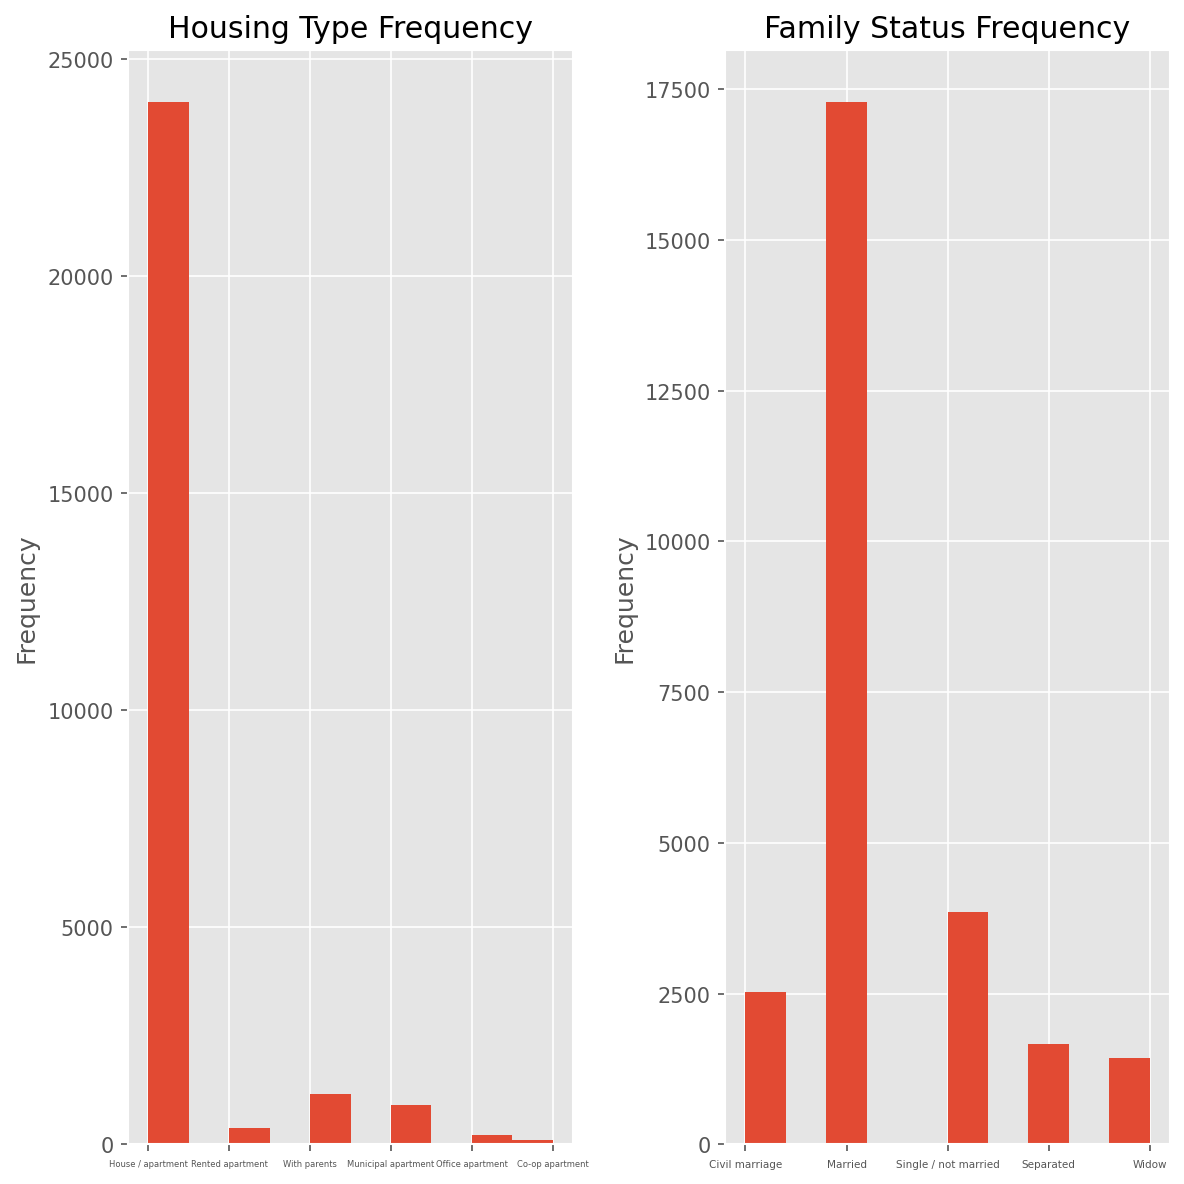

In [21]:
# Housing frequency and family status frequency

x1 = df['NAME_HOUSING_TYPE']
x2 = df['NAME_FAMILY_STATUS']


# Create a figure wiht 2 subplots
fig, axs = plt.subplots(1, 2, figsize = (8,8))

# Plot the histogram in the first subplot
axs[0].hist(x1)
axs[0].set_ylabel("Frequency")
axs[0].set_title('Housing Type Frequency')
axs[0].tick_params(axis='x', labelsize=4)

# Plot the histogram in second subplot
axs[1].hist(x2)
axs[1].set_ylabel("Frequency")
axs[1].set_title('Family Status Frequency')
axs[1].tick_params(axis='x', labelsize=5)

plt.tight_layout()

#### Observations
*Housing Type*

It seems that most individuals own houses or apartments, while other living situations are very rare. However, the second most likely housing situation is 'With Parents' while the least likely is a 'Co-op apartment'. 

*Family Status*

It seems like the family status that is most common by far is married. however, single is the second most common while widow status is the least common. 

## Feature engineering

a)	Create a new column AGE from DAYS_BIRTH by dividing the entries by 365.

b)	Create a new column AGE_GROUP depending on the AGE:
- "Very_Young": 19-25
- "Young": 25-35
- "Middle_Age": 35-60
- "Senior_Citizen": >60

c)	Plot the proportion of applicants with "TARGET"=1 within each age group. What do you observe?

d)	Repeat (c) but now separate the proportions by gender (CODE_GENDER) within each age group.


In [22]:
# Create new column AGE from DAYS_BIRTH by diving the entries by 365
df['AGE'] = df['DAYS_BIRTH'] / 365

In [23]:
# Define a function to calculate age group based on age
def get_age_group(age):
    if age <= 25:
        return "Very_Young"
    elif age <= 35:
        return "Young"
    elif age <= 60:
        return "Middle_Age"
    else:
        return "Senior_Citizen"

# Use apply function to create AGE_GROUP column
df['AGE_GROUP'] = df['AGE'].apply(get_age_group)


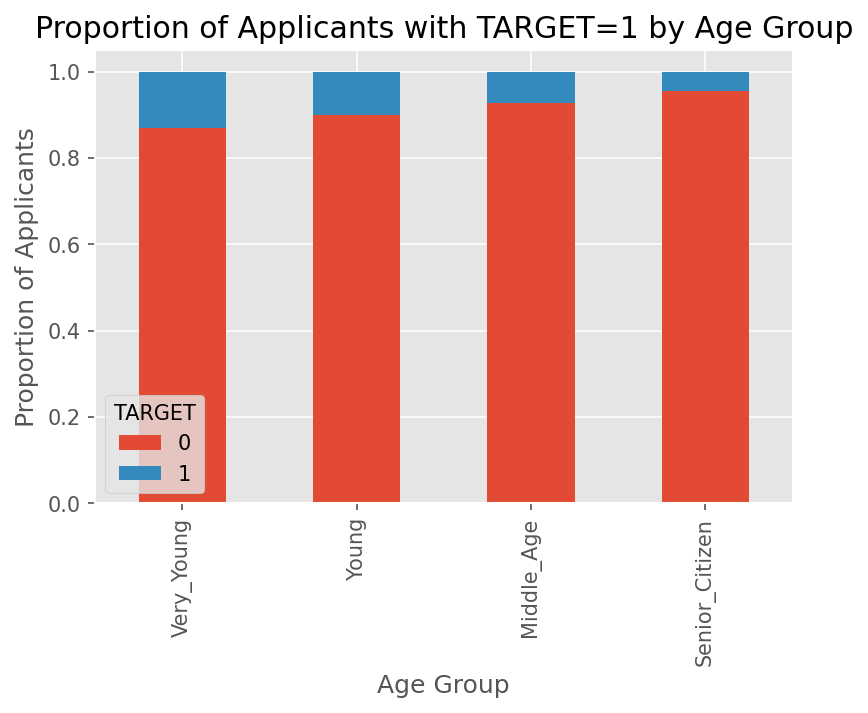

In [24]:
# Group the data by age group and calculate the proportion of applicants with TARGET=1
grouped = df.groupby('AGE_GROUP')['TARGET'].value_counts(normalize=True).unstack().fillna(0)
# Define the order of age groups
age_order = ['Very_Young', 'Young', 'Middle_Age', 'Senior_Citizen']
# Reorder the index of the DataFrame
grouped = grouped.reindex(age_order)
# Plot the bar chart
grouped.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Proportion of Applicants')
plt.title('Proportion of Applicants with TARGET=1 by Age Group')

# Show the plot
plt.show()

It seems like as the age increases, the TARGET=1 age group decreases. 

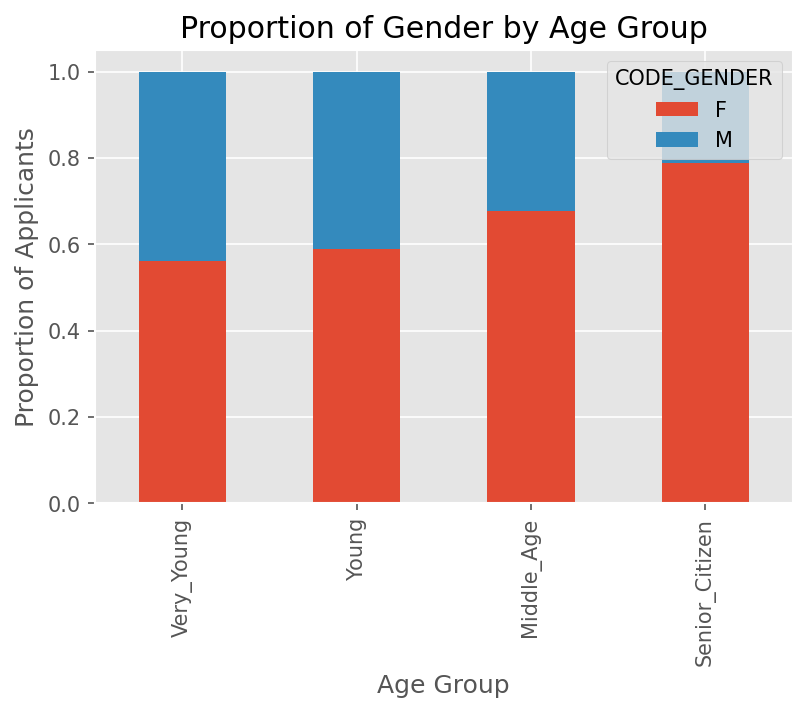

In [25]:
# Group the data by age group and calculate the proportion of applicants with TARGET=1
grouped = df.groupby('AGE_GROUP')['CODE_GENDER'].value_counts(normalize=True).unstack().fillna(0)
# Define the order of age groups
age_order = ['Very_Young', 'Young', 'Middle_Age', 'Senior_Citizen']
# Reorder the index of the DataFrame
grouped = grouped.reindex(age_order)
# Plot the bar chart
grouped.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Proportion of Applicants')
plt.title('Proportion of Gender by Age Group')

# Show the plot
plt.show()

It seems like as the age increases, the proportion of female applicants increase. 